In [3]:
import pandas as pd
df=pd.read_csv("GlobalCO2Emissions.csv")
df.head()

,Year,Emissions
0,1750,0.03
1,1760,0.03
2,1770,0.03
3,1780,0.03
4,1790,0.04


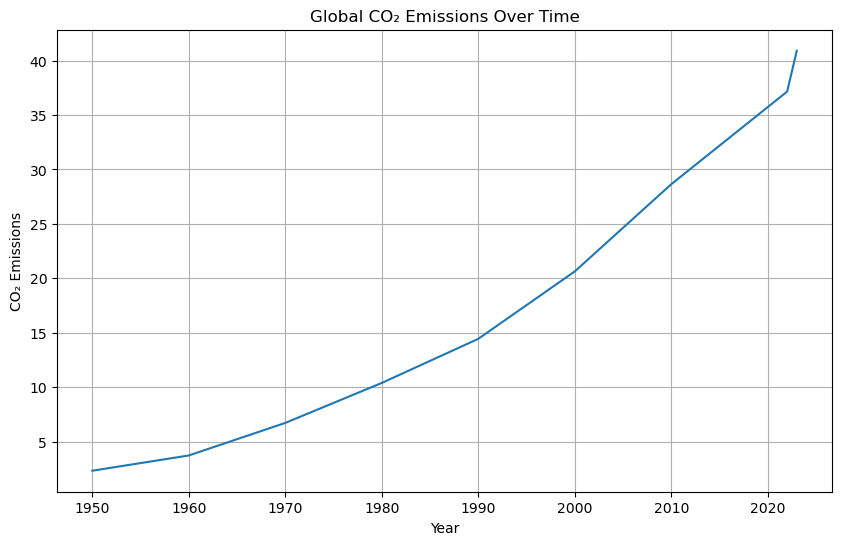

In [19]:
#Line Plot
df_close = df[df["Year"] >= 1950]

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=df_close,x="Year",y="Emissions")
plt.title("Global CO₂ Emissions Over Time") 
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.grid(True)
plt.show()

In [27]:
print(df["Year"].unique())

[1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880
 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2022
 2023]


In [29]:
years = [2000,2010,2022,2023]
df_check=df[df["Year"].isin(years)]

print(df_check)

    Year  Emissions
25  2000      20.64
26  2010      28.65
27  2022      37.15
28  2023      40.90


In [31]:
#Prediction
import xgboost as xgb
x=df[["Year"]]
y=df["Emissions"]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
model=xgb.XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(f"MAE = {mae}")
print(f"RMSE = {rmse}")
print(f"R2 = {r2}")

MAE = 1.965225679328044
RMSE = 3.679769637463147
R2 = 0.9253283922922023
